#   27 August 2025

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from decimal import Decimal
from fractions import Fraction

In [2]:
#   Floating point in Python is wack.
a = 0.1
b = 0.2
print(a+b)      #   prints 0.3+4E-16.
print(np.float128(a)+np.float128(b))
print(np.float16(a)+np.float16(b))
print(Decimal(a)+Decimal(b))
print(float(Fraction(1,10)+Fraction(1,5)))          #   explicit Fraction type

0.30000000000000004
0.30000000000000001665
0.2998
0.3000000000000000166533453694
0.3


##  Problem 2.6

Take the standard quadratic equation $ax^2 +bx+c=0$ where

$$x_{\pm} = \frac{-b \pm \sqrt{b^2 - 4ac}}{2a}$$

and $$x_+x_- = \frac{c}{a}$$

We note that for extremely large values of $b$, the value of the square root term will have a negligible difference: $\sqrt(-b^2-4ac) = b$

TODO
- [X] evaluate and print out x_-
- [X] evaluate and print out x_+
    - [X] use a = 1, c = 1, b = 1E9


In [3]:
a = 1
c = 1
b = 1e9

xp_bad = (-b+np.sqrt(b**2-4*a*c)) /(2*a)
xp_ekek = (-b+np.sqrt(b**2)) /(2*a)
xm = (-b-np.sqrt(b**2-4*a*c)) /(2*a)
xp_good = c/(a*xm)

print(f'xp_bad: {xp_bad}, xm: {xm}')
print(xp_bad,xp_good)
print(f'{xp_good*xm} \n')

def xm_func(aVar=a, bVar=b, cVar=c):
    return (-bVar-np.sqrt(bVar**2-4*aVar*cVar))/(2*aVar)
def xp_func(xmVar, aVar=a, cVar=c):
    return cVar/(aVar*xmVar)

xp_bad: 0.0, xm: -1000000000.0
0.0 -1e-09
1.0 



In [4]:
a = np.float128(1)
c = np.float128(1)

que_start = 4
que = np.logspace(que_start, 9, num=6)
b_mant = 10
b_arr = np.zeros(len(que))
xm_arr = np.zeros(len(que))
xp_arr = np.zeros(len(que))
logerr = np.zeros(len(que))
for i in range(len(que)):
    b_arr[i] = np.float128(b_mant*que[i])
    #print(b_new[i])
    xm_arr[i] = xm_func(bVar=b_arr[i])
    xp_arr[i] = xp_func(xmVar=xm_arr[i])
    logerr[i] = np.log10(np.abs(xp_arr[i]-xm_arr[i]))
    print(f'b = 10e{i+que_start}, xm={xm_arr[i]}, xp={xp_arr[i]}, Log error: {logerr[i]}')


b = 10e4, xm=-99999.99999, xp=-1.0000000001000001e-05, Log error: 4.9999999999131415
b = 10e5, xm=-999999.999999, xp=-1.000000000001e-06, Log error: 5.999999999999131
b = 10e6, xm=-9999999.9999999, xp=-1.00000000000001e-07, Log error: 6.999999999999991
b = 10e7, xm=-100000000.0, xp=-1e-08, Log error: 8.0
b = 10e8, xm=-1000000000.0, xp=-1e-09, Log error: 9.0
b = 10e9, xm=-10000000000.0, xp=-1e-10, Log error: 10.0


# <i>np.logspace()</i> syntax

np.logspace(start, endInclusive, num=howMany)

returns


##  Problem 2.8

We are given the function $$f(x)=\frac{1-cos(x)}{x^2}$$.

TODO
- [X] form x matrix where x = 0.1*i ; i from 1 to 100
- [X] verify mathematically ; limit at x = 0 and l'hopitals
- [X] check x = 1.2E-8
- [X] re-verify mathematically ; use identities
- [X] check x = 1.2E-8
- [X] compare all answers

1.1102230246251565e-16
1.44e-16
with g = 1.2e-08,
 f_1(g) = 0.7709882115452477


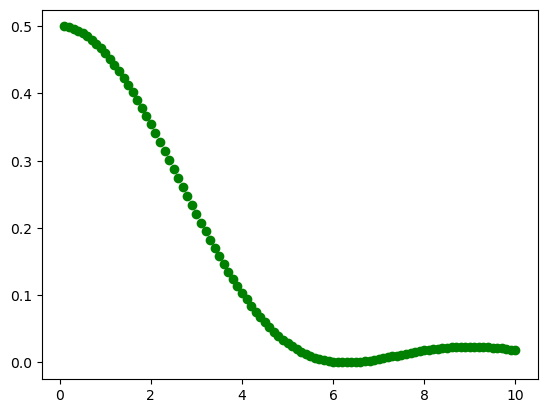

In [5]:
def func(xVar=1):
    return (1-np.cos(xVar))/(xVar**2)

g = 1.2E-8
start = 1
end = 100
x = np.linspace(0.1, 10, num=100)
y = np.zeros(len(x))
for i in range(len(x)):
    y[i]=func(x[i])

print(1-np.cos(g))
print(g**2)

print(f'with g = {g},\n f_1(g) = {func(g)}')
fig, ax = plt.subplots()
ax.scatter(x,y, color='green')
plt.show()

###  **Via L'Hopital's**
Note that via L'Hopital's Rule, $$\lim_{x\to0}f(x) = \lim_{x\to0}\frac{1-\cos(x)}{x^2} = \lim_{x\to0}\frac{+\sin(x)}{2x}$$ 
<br> where, as $\frac{\sin(x)}{x} goes to 1 as $x\to0$; <br>
we then have $$\lim_{x\to0} f(x) = \frac{1}{2}$$

### **Via trigonometric identity**

From the half-angle identity $$\sin\frac{\theta}{2} = \pm \sqrt{\frac{1-cos(\theta)}{2}}$$
$$\sin^2\left(\frac{\theta}{2}\right) = +\frac{1-cos(\theta)}{2} $$
therefore
$$2\sin^2\left(\frac{\theta}{2}\right) = 1-cos (\theta) $$
<br>
and so, we have

$$\lim_{x\to0}f(x)= \frac{2\sin^2\left(\frac{1}{2}x\right)}{x^2}$$

which we can rearrange into
$$\lim_{x\to0}f(x)
=\lim_{x\to0} 2\left(\frac{\sin\left(\frac{1}{2}x\right)}{x}\right)^2 
=\lim_{x\to0} 2\left(\frac{\sin\left(\frac{1}{2}x\right)}{2\cdot\frac{1}{2}x}\right)^2 
=\lim_{x\to0} \frac{2}{4}\left(\frac{\sin\left(\frac{1}{2}x\right)}{\frac{1}{2}x}\right)^2$$
which we then have
$$\lim_{x\to0}f(x)
= \frac{1}{2}\cdot(1)^2 = \frac{1}{2}$$
confirming our previous result.


In the following codeblock below, we simply redefine the function <code>func()</code> to be 
$$\lim_{x\to0}f(x)= \frac{2\sin^2\left(\frac{1}{2}x\right)}{x^2}$$

3.6e-17
1.44e-16
with g = 1.2e-08,
 f(g) = 0.5


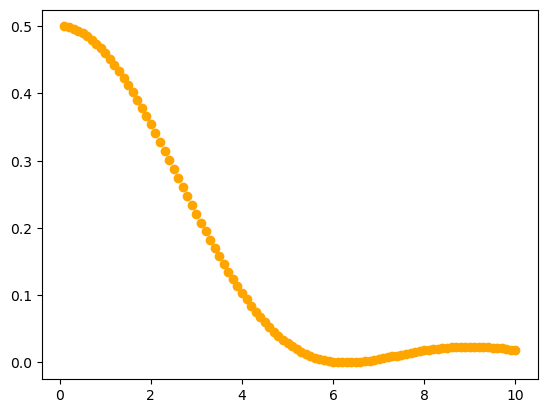

In [6]:
def func(xVar=1):
    return 2*(np.sin(0.5*xVar)**2)/(xVar**2)

g = 1.2E-8
start = 1
end = 100
x = np.linspace(0.1, 10, num=100)
y = np.zeros(len(x))
for i in range(len(x)):
    y[i]=func(x[i])

print(np.sin(0.5*g)**2)
print(g**2)
print(f'with g = {g},\n f(g) = {func(g)}')
fig, ax = plt.subplots()
ax.scatter(x,y, color='orange')
plt.show()